## Support sur les réseaux de neurones

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

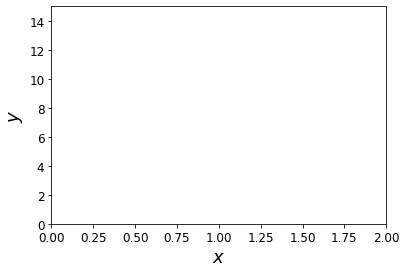

In [9]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

def crop(images):
    return images[150:220, 130:250]

## Exemple 1 : Reconnaissance de chat

### a) Apprentissage

In [10]:
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Matplotlib - plotting library to create graphs and charts
# import matplotlib.pyplot as plt

# TensorFlow - end-to-end open source platform for machine learning.
import tensorflow as tf

# Keras - high-level API for TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# OS module for Python
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.pyplot as plt
def showImages(arr):
     fig, axes = plt.subplots(1, 5, figsize=(20, 20))
     axes = axes.flatten()
     for img, ax in zip(arr, axes):
         ax.imshow(img)
     plt.tight_layout()
     plt.show()

Télécharger les 3 dossiers sur arche :

In [11]:
train_dir = './data/train'
validate_dir = './data/validation'
test_dir = './data/test'

Construction des images

In [12]:

train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')
validate_dogs_dir = os.path.join(validate_dir, 'dogs')
validate_cats_dir = os.path.join(validate_dir, 'cats')
test_cats_and_dogs_dir = os.path.join(test_dir, 'cats_and_dogs')

num_dogs_train = len(os.listdir(train_dogs_dir))
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_validate = len(os.listdir(validate_dogs_dir))
num_cats_validate = len(os.listdir(validate_cats_dir))

train_total = num_dogs_train + num_cats_train
validate_total = num_dogs_validate + num_cats_validate
test_total = len(os.listdir(test_cats_and_dogs_dir))

batch_size = 32
img_size = 150

img_gen = ImageDataGenerator(rescale=1./255)

train_img_gen = img_gen.flow_from_directory(batch_size=batch_size,
                                           directory=train_dir,
                                           shuffle=True,
                                           target_size=(img_size, img_size),
                                           class_mode='binary')

validate_img_gen = img_gen.flow_from_directory(batch_size=batch_size,
                                               directory=validate_dir,
                                               shuffle=False,
                                               target_size=(img_size, img_size),
                                               class_mode='binary')

test_img_gen = img_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test_dir,
                                               shuffle=False,
                                               target_size=(img_size, img_size),
                                               class_mode=None)
                                               
                                               
#showImages([train_img_gen[0][0][0] for i in range(15)])

Found 20000 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 200 images belonging to 1 classes.


Construction de l'architecture

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', # rmsprop or adam
              metrics=['accuracy'])
              
model.summary()

2022-03-11 16:13:57.326724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-11 16:13:57.328105: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-11 16:13:57.328147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d3e81859983b): /proc/driver/nvidia/version does not exist
2022-03-11 16:13:57.334729: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

Entrainement du modèle 
&rarr; **Très long !!**

In [14]:
fit_result = model.fit_generator(
            train_img_gen,
            steps_per_epoch=int(np.ceil(train_total / float(batch_size))),
            epochs=5,
            validation_data=validate_img_gen,
            validation_steps=int(np.ceil(validate_total / float(batch_size)))
            )

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-11 16:13:57.683598: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 8640000 exceeds 10% of free system memory.
2022-03-11 16:13:57.832239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-03-11 16:13:58.703715: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 8640000 exceeds 10% of free system memory.
2022-03-11 16:13:58.710322: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 89718784 exceeds 10% of free system memory.
2022-03-11 16:13:58.798842: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22429696 exceeds 10% of free system memory.
2022-03-11 16:13:58.813564: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 42467328 exceeds 10% of free system memory.


625/625 [==============================] - 338s 539ms/step - loss: 0.6340 - accuracy: 0.6380 - val_loss: 0.4971 - val_accuracy: 0.7679
Epoch 2/5
625/625 [==============================] - 351s 562ms/step - loss: 0.4858 - accuracy: 0.7697 - val_loss: 0.4627 - val_accuracy: 0.7862
Epoch 3/5
625/625 [==============================] - 379s 606ms/step - loss: 0.4023 - accuracy: 0.8192 - val_loss: 0.3975 - val_accuracy: 0.8208
Epoch 4/5
625/625 [==============================] - 350s 560ms/step - loss: 0.3415 - accuracy: 0.8530 - val_loss: 0.3551 - val_accuracy: 0.8494
Epoch 5/5
625/625 [==============================] - 356s 569ms/step - loss: 0.3028 - accuracy: 0.8730 - val_loss: 0.3913 - val_accuracy: 0.8469


Sauvegarde du modèle

In [15]:
model.save_weights('model.h5')

### b) Utilisation

Le fichier [model](model.h5) contient les poids d'un réseau CNN appris à l'aide de la base disponible [ici](https://www.kaggle.com/c/dogs-vs-cats/data) et du programme [learnCat.py](learnCat.py)

![](https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif)

Pour charger le modèle, utiliser : 

In [16]:
# Keras - high-level API for TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator



###########################
#  Définition du CNN      #
###########################

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


###################################
#  Chargement des poids entraînés #
###################################

model.load_weights('model.h5');

In [17]:
def predict_class(fichier):
    #import image 
    image=plt.imread(fichier)
    plot_image(image)
    #preprocess image
    image=np.array(image)
    image=image.astype("float32")/255
    #predict
    img_size = 150
    inference=model.predict((tf.expand_dims(tf.image.resize(image,(img_size,img_size)),axis=0)))
    predicted_class_indices = np.round(inference)
    print(predicted_class_indices)



Pour tester, une image :

In [19]:
predict_class('dog.jpg')

[[1.]]


Faire des expériences avec plusieurs images d'internet et faire en compte rendu ci-dessous

## Exemple 2 : Utilisation d'un modèle pré-entraîné

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [24]:
model = ResNet50(weights="imagenet")

102981632/102967424 [==============================] - 3s 0us/step


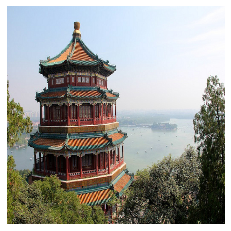

In [25]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape


images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


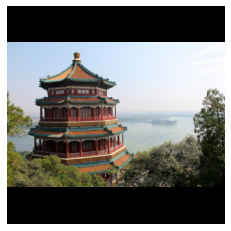

In [26]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

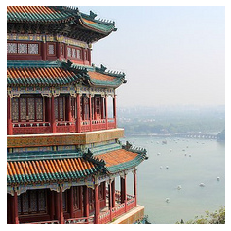

In [27]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()

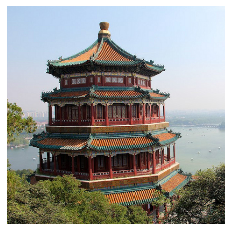

In [28]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [39]:
from tensorflow.keras.applications.resnet50 import preprocess_input
inputs = preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

In [40]:
Y_proba.shape

(2, 1000)

In [42]:
from tensorflow.keras.applications.resnet50 import decode_predictions
#top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
top_K = decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

49152/35363 [=========================================] - 0s 0us/step
Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%

